# 월간 신용카드 사기 거래를 탐지하는 AI 만들기
# 
###### 이하 내용의 데이터 및 대회 시스템 출처는 국내 데이터 경진 대회 플랫폼 "DACON" 을 참고로 함(대회 동의사항 A. 교육에 활용될 수 있음 조항)
###### https://dacon.io/competitions/official/235930/overview/agreement

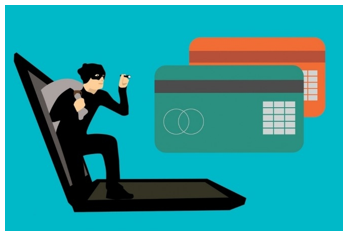
###### 이미지 출처 : https://cmobile.g-enews.com/article/Finance/2020/02/202002061516286234a218188523_1?md=20200206151744_V

## 
## 개요
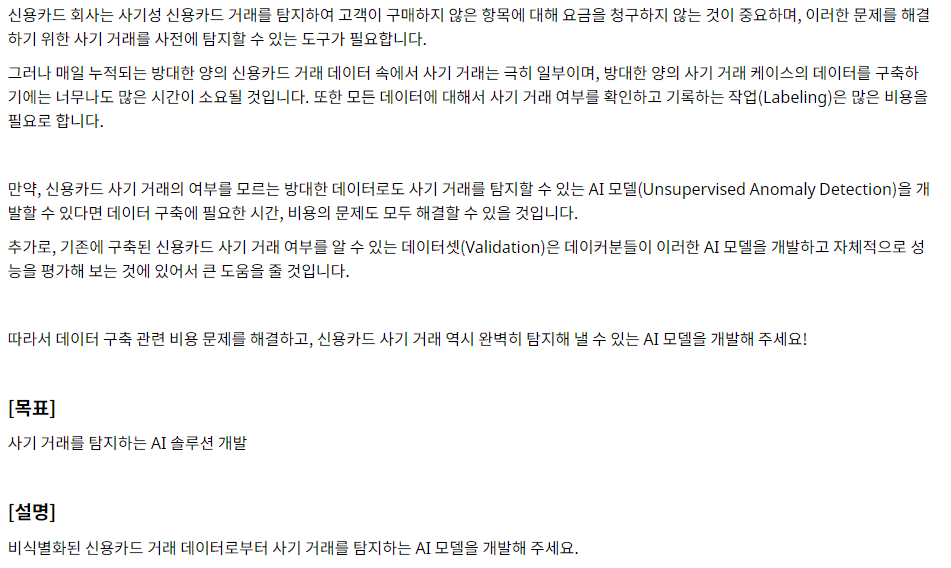

# 
## 신용카드 거래 데이터셋 소개와 평가 방법

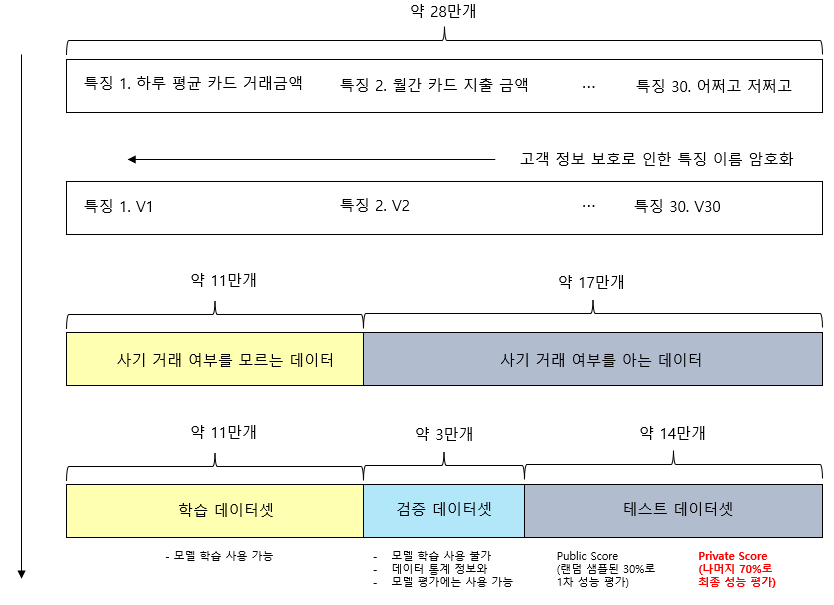

## 상세내용 :
### - 해당 신용카드사는 30개의 특징을 가지는 데이터를 약 28만개 보유 중.
### - 예) 특징1. 고객당 하루 평균 카드 거래금액,  특징2. 고객당 월간 카드 지출 금액 등
### - 하지만, 신용카드사는 고객의 정보를 법적으로 보호하고자 이런 특징을 AI 엔지니어들에게 얘기해주지 못하며 V1, V2 등으로 특징의 간이 이름을 부여하여 데이터셋을 제공함.
## 
### - 신용카드 거래 데이터의 큰 특징으로 
### 1. 대부분의 거래 데이터는 정상 거래 데이터들임(사기 거래 데이터가 극히 적음). (데이터 불균형)
### 2. 정상인지 사기인지 정답을 아는 데이터셋을 구축하기 어려움.
### - 이에 신용카드사는
### 1. 사기 거래 여부를 모르는 데이터 약 11만개를 모델 학습에 사용하라고 제공함.
### 2. 사기 거래 여부를 아는 데이터 중 약 3만개(검증 데이터셋)으로 모델 평가에 간접적으로 사용 가능.
### 3. 나머지 약 14만개(테스트 데이터셋) 중에 대회 기간 중 자신의 AI 모델이 잘하는지 평가하기 위해 30%만 가지고 1차 성능을 평가함(Public Score).
### 4. 테스트 데이터셋 중 나머지 70%을 가지고 최종 모델 성능을 평가함(Private Score).

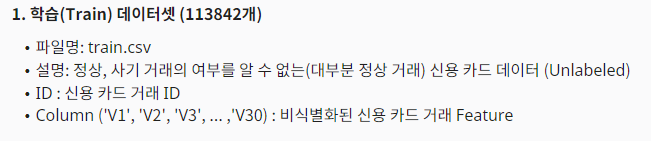

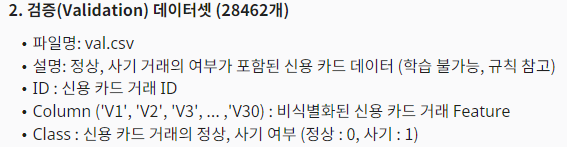

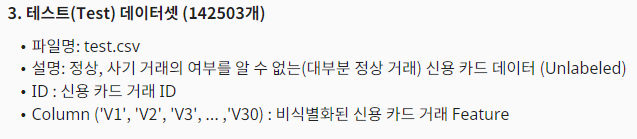

## 조건
### 1. 학습 데이터셋만 모델 학습에 사용 가능
### 2. 검증 데이터셋은 모델 학습에 사용 불가하지만 데이터 통계 정보와 모델 평가에는 사용 가능
### 3. 테스트 데이터셋은 리더보드(Public, Private Score 산출) 제출을 위한 추론에만 사용 가능(모델 학습 사용 불가)

# 
# 가장 중요한게 무엇일까?
## 
## 목적을 정의하는 것이 중요
## : 우리의 목적은 주어진 신용 카드 거래 데이터를 가지고 신용카드 사기 거래를 잡아내는 좋은 AI 모델을 만드는 것
### - 이때 주어진 신용 카드 거래 데이터는
### 1. 사기 거래 여부를 알 수 없지만 모델 학습에 사용할 수 있는 학습 데이터 약 11만개,
### 2. 사기 거래 여부를 알지만 데이터 통계 정보와 모델 평가에만 사용할 수 있는 검증 데이터 약 3만개
### - 좋은 AI 모델을 만들기 위해
### 1. 좋은 AI 모델인지 판정하기 위한 지표로 테스트 데이터셋에 대한 F1-score 을 사용함.
###### F1-score 설명 링크 : https://dacon.io/forum/405817

# 
# 
# 
# 이전 실험에서 가장 크게 의심되는 요인은 변수 선택과 군집화 방법으로 생각됨.
# 그래서 이번 실험에서는 변수 선택을 간단한 방법으로 시도해보았다.
# 검증데이터셋에 대해 2개 변수간 관계를 보고 시각적으로 잘 나눠지는 변수를 선택하여 군집화 시행 후, 여러 개의 군집화 모델에 대해 앙상블을 사용함. 그림으로 표현하면 다음과 같다.
# 
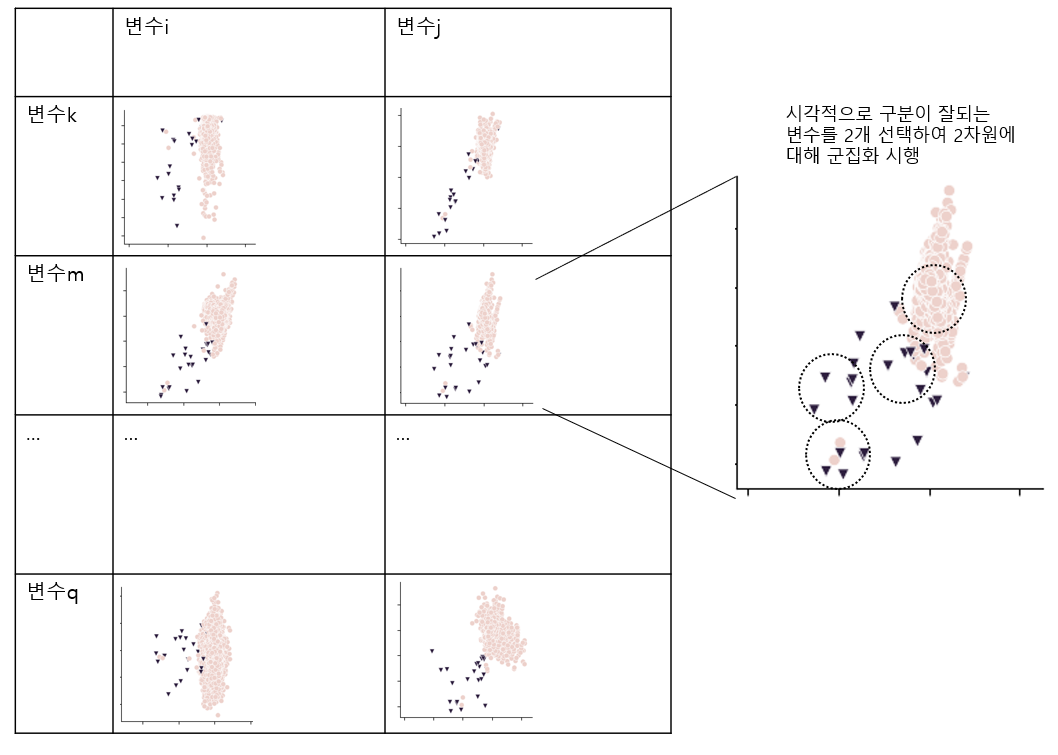

# 
# 신용카드 거래 데이터 분석

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys

## 학습데이터와 검증데이터 그리고 테스트 데이터 불러오기
###### 데이터 다운로드 : https://dacon.io/competitions/official/235930/data

In [2]:
path = "/home/oem/KYM/Kaggle_ex/Dataset/월간_신용카드_사기거래/" # 데이터 저장 path 설정
train_data = pd.read_csv(path + "train.csv")
test_data = pd.read_csv(path + "test.csv")
val_data = pd.read_csv(path + "val.csv")

print("학습데이터 상위 5개 데이터 출력 : \n", train_data.head())

print("학습데이터 정보")
print(train_data.info())

학습데이터 상위 5개 데이터 출력 : 
    ID        V1        V2        V3        V4        V5        V6        V7  \
0   3 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
1   4 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
2   6 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
3   8 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
4   9 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
1  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
2  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
3 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
4  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   

        V26       V27

# 
## 검증데이터셋의 레이블은 따로 저장하고, 각 데이터셋의 필요없는 ID 열은 제거하자.

In [3]:
label_data = val_data['Class']

train_data = train_data.drop(['ID'], axis=1)
val_data = val_data.drop(['ID'], axis=1)
val_data = val_data.drop(['Class'], axis=1)
test_data = test_data.drop(['ID'], axis=1)

## 그러므로 이번 실험에서는 각 데이터셋 마다, 그리고 각 변수 마다 이상치들을 포착하여 제외한 뒤에 데이터들의 평균과 표준편차를 계산하여 그 값으로 이상치를 버리지 않은 원래 학습, 검증, 테스트 데이터셋에 정규화를 진행하였다. 

In [4]:
m_list = []
std_list = []

for i in range(1,31):
    q_25 = train_data['V{}'.format(i)].quantile(0.25)
    q_75 = train_data['V{}'.format(i)].quantile(0.75)
    IQR = q_75 - q_25

    minimum = q_25 - 1.5 * IQR
    maximum = q_75 + 1.5 * IQR

    idx = np.array(np.where((train_data['V{}'.format(i)] >= minimum) & (train_data['V{}'.format(i)] <= maximum)))
    idx = np.reshape(idx, (-1))

    outlier_remove_data = train_data['V{}'.format(i)]
    outlier_remove_data = outlier_remove_data[idx]
    m = outlier_remove_data.mean()
    std = outlier_remove_data.std()
    
    m_list.append(m)
    std_list.append(std)
train_data_n = (train_data - m_list) / std_list


m_list = []
std_list = []

for i in range(1,31):
    q_25 = val_data['V{}'.format(i)].quantile(0.25)
    q_75 = val_data['V{}'.format(i)].quantile(0.75)
    IQR = q_75 - q_25

    minimum = q_25 - 1.5 * IQR
    maximum = q_75 + 1.5 * IQR

    idx = np.array(np.where((val_data['V{}'.format(i)] >= minimum) & (val_data['V{}'.format(i)] <= maximum)))
    idx = np.reshape(idx, (-1))

    outlier_remove_data = val_data['V{}'.format(i)]
    outlier_remove_data = outlier_remove_data[idx]
    m = outlier_remove_data.mean()
    std = outlier_remove_data.std()
    
    m_list.append(m)
    std_list.append(std)
val_data_n = (val_data - m_list) / std_list


m_list = []
std_list = []

for i in range(1,31):
    q_25 = test_data['V{}'.format(i)].quantile(0.25)
    q_75 = test_data['V{}'.format(i)].quantile(0.75)
    IQR = q_75 - q_25

    minimum = q_25 - 1.5 * IQR
    maximum = q_75 + 1.5 * IQR

    idx = np.array(np.where((test_data['V{}'.format(i)] >= minimum) & (test_data['V{}'.format(i)] <= maximum)))
    idx = np.reshape(idx, (-1))

    outlier_remove_data = test_data['V{}'.format(i)]
    outlier_remove_data = outlier_remove_data[idx]
    m = outlier_remove_data.mean()
    std = outlier_remove_data.std()
    
    m_list.append(m)
    std_list.append(std)
test_data_n = (test_data - m_list) / std_list

## 정규화를 진행 후 학습, 검증, 테스트 데이터의 분포 비교 시각화

첫 번째 변수 선택 : 23
두 번째 변수 선택 : 3


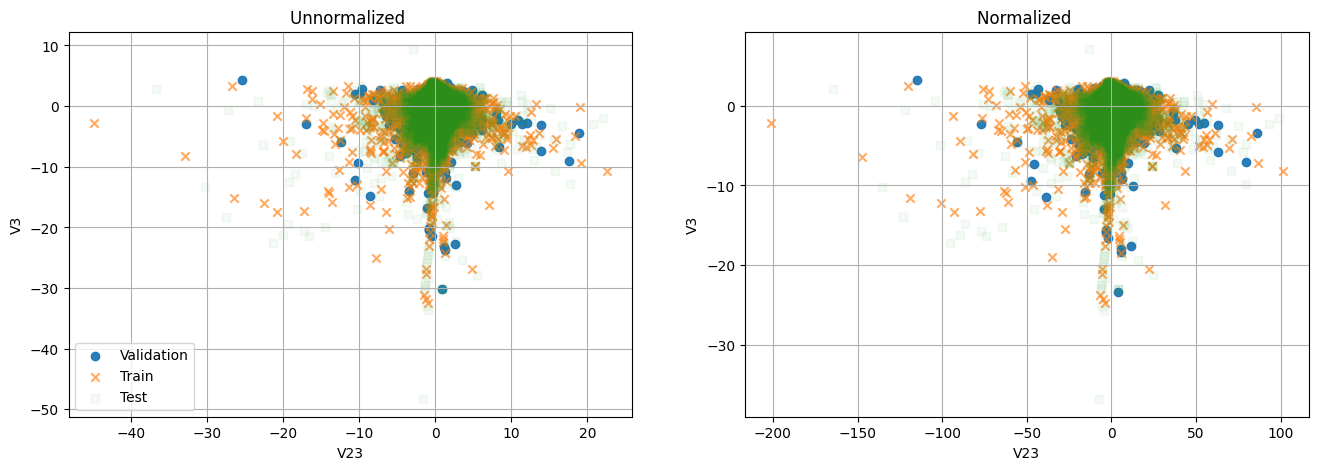

In [5]:
num1 = int(input("첫 번째 변수 선택 : "))
num2 = int(input("두 번째 변수 선택 : "))

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(121)
ax.scatter(val_data['V{}'.format(num1)], val_data['V{}'.format(num2)], label="Validation", alpha=0.95)
ax.scatter(train_data['V{}'.format(num1)], train_data['V{}'.format(num2)], label='Train', marker='x', alpha=0.65)
ax.scatter(test_data['V{}'.format(num1)], test_data['V{}'.format(num2)], label='Test', marker='s', alpha=0.05)
plt.xlabel("V{}".format(num1))
plt.ylabel("V{}".format(num2))
plt.title("Unnormalized ")
plt.legend()
plt.grid()

ax = fig.add_subplot(122)
ax.scatter(val_data_n['V{}'.format(num1)], val_data_n['V{}'.format(num2)], label="Validation", alpha=0.95)
ax.scatter(train_data_n['V{}'.format(num1)], train_data_n['V{}'.format(num2)], label='Train', marker='x', alpha=0.65)
ax.scatter(test_data_n['V{}'.format(num1)], test_data_n['V{}'.format(num2)], label='Test', marker='s', alpha=0.05)
plt.xlabel("V{}".format(num1))
plt.ylabel("V{}".format(num2))
plt.title("Normalized ")
plt.grid()
plt.show()

# 
# Ver1 에서 검증데이터의 pairplot 을 보면 14, 16, 17번 변수들이 구분이 잘되는 것을 볼 수 있다.

# 
# 가설 검증을 위해 소규모 군집을 시행하기 위해 K-means clusering 알고리즘을 사용해보자

In [6]:
from sklearn.cluster import KMeans

## 실험에 사용한 코드는 다음과 같다.
### 1. 14, 16, 17번 변수 각각에 대해 1-28번 변수를 각각 포함한 것. (즉, 자기 변수를 제외한 14번 변수 X 27 + 16번 변수 X 27 + 17번 변수 X 27 = 총 81 개의 데이터셋에 대한 K means 수행
### 2. 각 2개변수로 추려진 데이터셋을 k means 알고리즘(클러스터 수는 5개점마다 한 군집을 이루도록함)을 수행 후에 검증데이터셋의 사기거래 데이터 30개를 어느 군집에 포함되는지 예측, 
### 3. 테스트데이터를 대입하여 사기거래 데이터인지 예측
### 4. 총 81개의 테스트데이터에 대한 레이블 예측이 형성되며 과반수를 이용한 사기거래를 예측하여 제출
### * 시간이 꽤나오래걸림( 81회 하는데 40시간정도..)

In [7]:
# 검증데이터 사기 데이터 30개만 뽑아놓기
val_d = np.array(val_data_n)
label_array = np.array(label_data)
idx = np.where(label_array == 1.)
val_d = val_d[idx]

total_test_prediction_list = [] # 테스트데이터 앙상블 저장용

idx_list = [14, 16, 17]

for feat_idx in idx_list :
    for j in range(1,29):
        if feat_idx == j : continue
        else :
            kmeans = KMeans(n_clusters=22768) # 5 개 사이즈 군집
            #kmeans = KMeans(n_clusters=3)
            data1 = train_data_n['V{}'.format(feat_idx)]
            data2 = train_data_n['V{}'.format(j)]
            data = []
            data = np.c_[data1, data2]
            
            kmeans.fit(data)
            
            val_data1 = val_d[:, feat_idx-1]
            val_data2 = val_d[:, j-1]
            val_data = []
            val_data = np.c_[val_data1, val_data2]
            pred_val = kmeans.predict(val_data)
            unnormal_idx = np.array(pred_val)
            
            test_data1 = test_data_n['V{}'.format(feat_idx)]
            test_data2 = test_data_n['V{}'.format(j)]
            test_data = []
            test_data = np.c_[test_data1, test_data2]
            pred_test = kmeans.predict(test_data)
            
            test_array = np.zeros(len(test_data))
            for l_idx in unnormal_idx:
                idx = np.where(pred_test == l_idx)
                test_array[idx] = 1
            total_test_prediction_list.append(test_array)
            
            print("{} 와 {} 변수 해서 나온 이상치라고 한 수 : {}".format(feat_idx, j , np.sum(test_array == 1)))

14 와 1 변수 해서 나온 이상치라고 한 수 : 66
14 와 2 변수 해서 나온 이상치라고 한 수 : 77
14 와 3 변수 해서 나온 이상치라고 한 수 : 71
14 와 4 변수 해서 나온 이상치라고 한 수 : 82
14 와 5 변수 해서 나온 이상치라고 한 수 : 78
14 와 6 변수 해서 나온 이상치라고 한 수 : 70
14 와 7 변수 해서 나온 이상치라고 한 수 : 74
14 와 8 변수 해서 나온 이상치라고 한 수 : 79
14 와 9 변수 해서 나온 이상치라고 한 수 : 99
14 와 10 변수 해서 나온 이상치라고 한 수 : 95
14 와 11 변수 해서 나온 이상치라고 한 수 : 82
14 와 12 변수 해서 나온 이상치라고 한 수 : 80
14 와 13 변수 해서 나온 이상치라고 한 수 : 76
14 와 15 변수 해서 나온 이상치라고 한 수 : 84
14 와 16 변수 해서 나온 이상치라고 한 수 : 96
14 와 17 변수 해서 나온 이상치라고 한 수 : 80
14 와 18 변수 해서 나온 이상치라고 한 수 : 87
14 와 19 변수 해서 나온 이상치라고 한 수 : 84
14 와 20 변수 해서 나온 이상치라고 한 수 : 72
14 와 21 변수 해서 나온 이상치라고 한 수 : 88
14 와 22 변수 해서 나온 이상치라고 한 수 : 88
14 와 23 변수 해서 나온 이상치라고 한 수 : 75
14 와 24 변수 해서 나온 이상치라고 한 수 : 81
14 와 25 변수 해서 나온 이상치라고 한 수 : 84
14 와 26 변수 해서 나온 이상치라고 한 수 : 68
14 와 27 변수 해서 나온 이상치라고 한 수 : 86
14 와 28 변수 해서 나온 이상치라고 한 수 : 92
16 와 1 변수 해서 나온 이상치라고 한 수 : 134
16 와 2 변수 해서 나온 이상치라고 한 수 : 92
16 와 3 변수 해서 나온 이상치라고 한 수 : 90
16 와 4 변수 해서 나온 이상치라고 한 수 : 104
16 와 5 변수 해서 나온 이상치

## 81개의 k mean clustering 에 대한 테스트 데이터의 레이블 예측 리스트를 저장하자

In [16]:
kmean_test_list = total_test_prediction_list
save_path = '/home/oem/KYM/Kaggle_ex/Dataset/월간_신용카드_사기거래/군집81개_테스트_예측.csv'

In [17]:
vote2 = np.sum(total_test_prediction_list, axis=0)
print(np.shape(vote2))

(142503,)


In [18]:
print(vote2[:5])

[0. 0. 0. 0. 0.]


## 과반수를 통해 예측하려고 한 결과(81개의 k mean 중 41개 이상) 사기 거래 레이블이 9개만 나옴
## 일단 그래서 1-10까지 사기 거래 레이블이라고 하면 예측하게 해야함

In [25]:
for i in range(1,11):
    pred_list = np.zeros((len(vote2)))
    idx = np.where(vote2 >= i)
    pred_list[idx] = 1.
    s= np.sum(pred_list)
    print("{} 개 이상인 경우 카드 거래 사기로 예측 개수 : {}".format(i, s))
    save_path = '/home/oem/KYM/Kaggle_ex/Dataset/월간_신용카드_사기거래/k_mean_81_{}.csv'.format(str(i))
    np.savetxt(save_path, pred_list)

1 개 이상인 경우 카드 거래 사기로 예측 개수 : 3966.0
2 개 이상인 경우 카드 거래 사기로 예측 개수 : 671.0
3 개 이상인 경우 카드 거래 사기로 예측 개수 : 345.0
4 개 이상인 경우 카드 거래 사기로 예측 개수 : 282.0
5 개 이상인 경우 카드 거래 사기로 예측 개수 : 238.0
6 개 이상인 경우 카드 거래 사기로 예측 개수 : 213.0
7 개 이상인 경우 카드 거래 사기로 예측 개수 : 193.0
8 개 이상인 경우 카드 거래 사기로 예측 개수 : 176.0
9 개 이상인 경우 카드 거래 사기로 예측 개수 : 161.0
10 개 이상인 경우 카드 거래 사기로 예측 개수 : 138.0


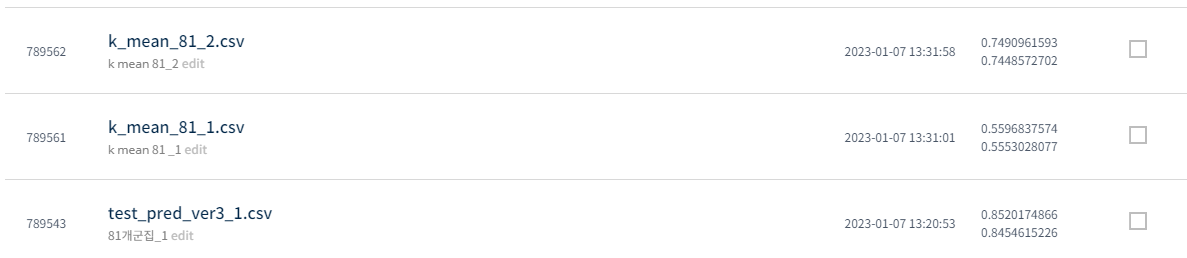

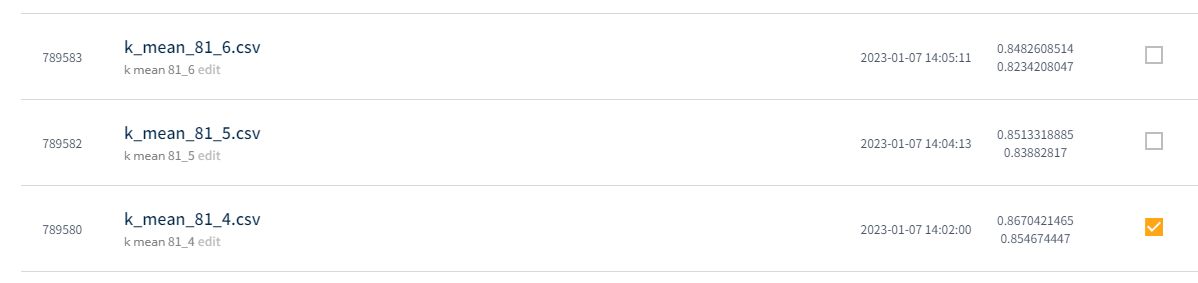

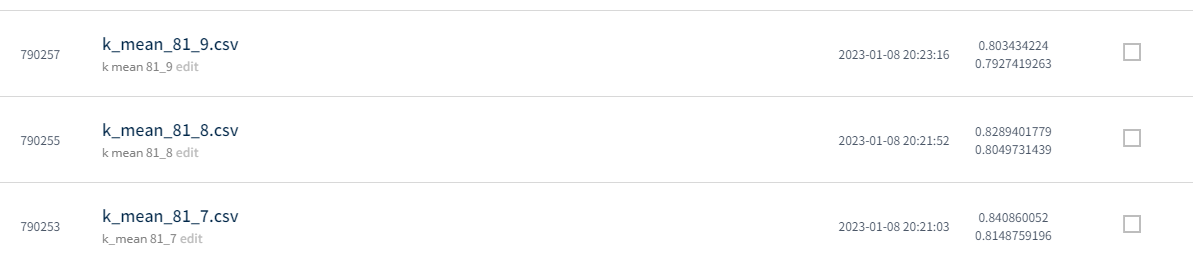